<a href="https://colab.research.google.com/github/davibuss/Networks-Dynamics/blob/main/Homework_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# PROBLEM 1

## Part a

In [2]:
np.random.seed(0)
n_nodes=500
G = nx.circulant_graph(n_nodes, [1, 2])

In [3]:
def model_epidemics(G=G,beta=0.3,ro=0.7,infected_start=10,weeks=15,N=100,n_nodes=500):
    G=G
    S_nodes=np.empty((N,weeks),dtype=int)
    I_nodes=np.empty((N,weeks),dtype=int)
    R_nodes=np.empty((N,weeks),dtype=int)
    new_I_nodes=np.empty((N,weeks),dtype=int)
    
    I_nodes[:,0] = infected_start 
    new_I_nodes[:,0] = infected_start
    S_nodes[:,0] = n_nodes-infected_start
    R_nodes[:,0] = 0
    
    for n in range(N):
    
        nodes_change = np.zeros((n_nodes, 2), dtype=int)
        for i in np.random.choice(G.nodes, size=(infected_start,),replace=False):
            nodes_change[i, 0] = 1
        for w in range(0,weeks):

            s_week=0
            i_week=0
            r_week=0
            new_i_week=0

            for node in G.nodes:
                if(nodes_change[node,0]==0):
                    m=0

                    for i in G.neighbors(node):
                        if nodes_change[i,0] == 1:#1 − (1 − β) m
                            m+=1
                    if np.random.random(1)[0] < (1-beta)**m:
                        nodes_change[node,1]=0
                        s_week = s_week + 1
                    else:
                        nodes_change[node,1]=1
                        new_i_week = new_i_week +1
                        i_week = i_week +1

                elif(nodes_change[node,0]==1):

                    if np.random.random(1)[0]< ro:
                        nodes_change[node,1]= 2
                        r_week= r_week + 1
                    else:
                        nodes_change[node,1] = 1
                        i_week = i_week + 1
                else:
                    nodes_change[node,1] = 2
                    r_week = r_week + 1
                
            S_nodes[n,w] = s_week
            I_nodes[n,w] = i_week
            R_nodes[n,w] = r_week
            new_I_nodes[n,w] = new_i_week
            nodes_change[:, 0] = nodes_change[:, 1]

    S_nodes_avg = np.mean(S_nodes, axis=0)
    I_nodes_avg = np.mean(I_nodes, axis=0)
    R_nodes_avg = np.mean(R_nodes, axis=0)
    new_I_nodes_avg = np.mean(new_I_nodes, axis=0)

    
    
    return S_nodes_avg, I_nodes_avg, R_nodes_avg, new_I_nodes_avg

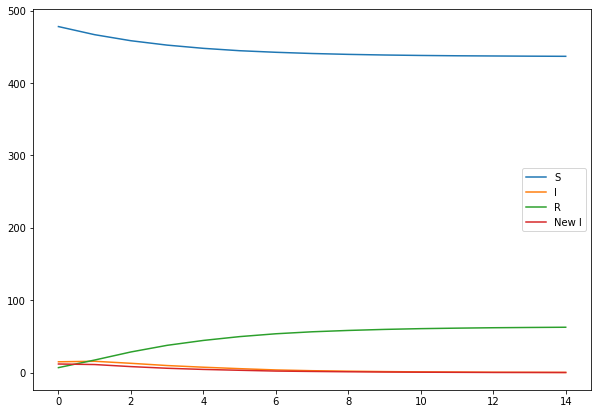

In [4]:
S_nodes_avg,I_nodes_avg,R_nodes_avg,new_I_nodes_avg = model_epidemics()
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(S_nodes_avg, label='S')
ax.plot(I_nodes_avg, label='I')
ax.plot(R_nodes_avg, label='R')
ax.plot(new_I_nodes_avg, label='New I')
ax.legend(loc='best');

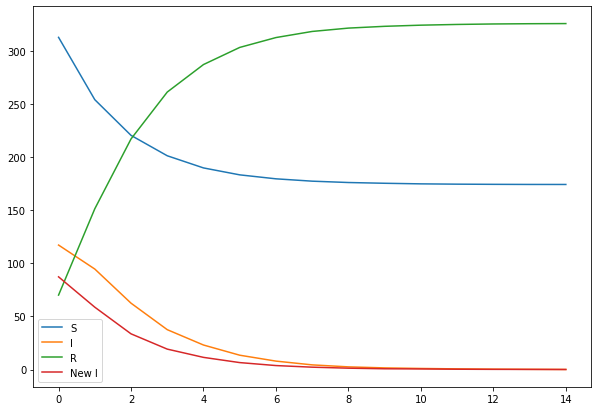

In [5]:
S_nodes_avg,I_nodes_avg,R_nodes_avg,new_I_nodes_avg = model_epidemics(infected_start=100)
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(S_nodes_avg, label='S')
ax.plot(I_nodes_avg, label='I')
ax.plot(R_nodes_avg, label='R')
ax.plot(new_I_nodes_avg, label='New I')
ax.legend(loc='best');

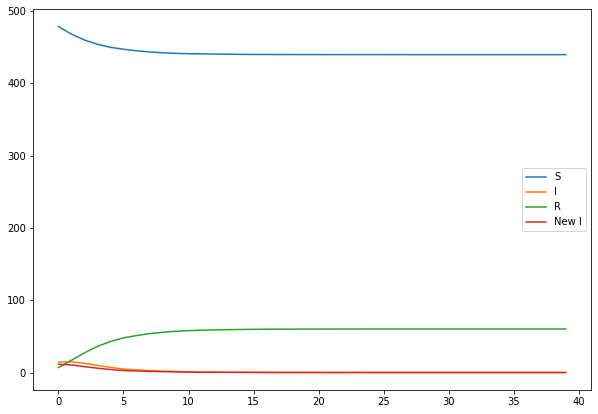

In [6]:
S_nodes_avg,I_nodes_avg,R_nodes_avg,new_I_nodes_avg = model_epidemics(weeks=40)
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(S_nodes_avg, label='S')
ax.plot(I_nodes_avg, label='I')
ax.plot(R_nodes_avg, label='R')
ax.plot(new_I_nodes_avg, label='New I')
ax.legend(loc='best');

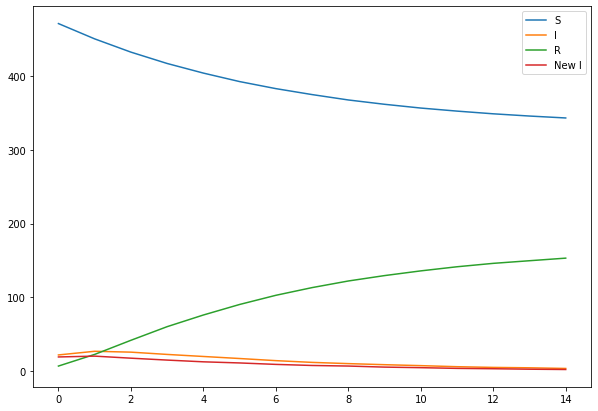

In [7]:
S_nodes_avg,I_nodes_avg,R_nodes_avg,new_I_nodes_avg = model_epidemics(beta=0.5)
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(S_nodes_avg, label='S')
ax.plot(I_nodes_avg, label='I')
ax.plot(R_nodes_avg, label='R')
ax.plot(new_I_nodes_avg, label='New I')
ax.legend(loc='best');

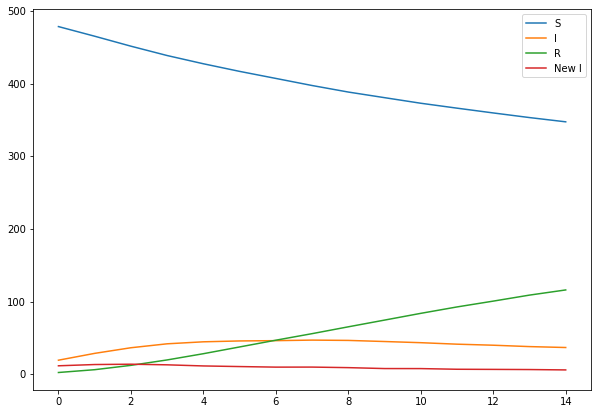

In [8]:
S_nodes_avg,I_nodes_avg,R_nodes_avg,new_I_nodes_avg = model_epidemics(ro=0.2)
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(S_nodes_avg, label='S')
ax.plot(I_nodes_avg, label='I')
ax.plot(R_nodes_avg, label='R')
ax.plot(new_I_nodes_avg, label='New I')
ax.legend(loc='best');

## Part b

In [9]:
def doRandomGraph(n_nodes=900,k=4):
    H = nx.complete_graph(k + 1)
    c = np.full((n_nodes), int(k/2), dtype=int) #Ogni volta che aggiungo un nodo, esso deve avere grado 2
    #Perciò: nodo 0 -> do grado 2
    #nodo 1 -> do grado 2 ecc.
    #print(c)

    #Problem of k odd

    if k % 2  != 0:
        c[::2] += 1 #[start:end:step].
    #print (c)
    #Alternativamente aggiungoo metà e tolgo metà
    #Fino a questo momento ho il grafo completo costituito da 5 nodi
    for i in range(k+1,n_nodes):#Parto dall'aggiungere il quinto nodo
        weights = np.empty(i,dtype=int)
        #print(weights)

        for node in H.nodes:
            #print(node)
            weights[node] = H.degree(node)
        weights_sum = np.sum(weights)
        #print(weights_sum)
        p = weights/weights_sum
        #print(p)
        #print(G.nodes)

        neighbors = np.random.choice(H.nodes, size=c[i], replace=False, p=p)
        
        for node in neighbors:
            H.add_edge(i, node)
    return H
        
        

In [10]:
RG=doRandomGraph(k=4)

deg = 0
for node in RG.nodes:
    deg += RG.degree(node)
print("Average degree:", deg/len(RG.nodes))

Average degree: 4.0


In [11]:
RG=doRandomGraph(k=7)

deg = 0
for node in RG.nodes:
    deg += RG.degree(node)
print("Average degree:", deg/len(RG.nodes))

Average degree: 7.0


Average degree: 3.0


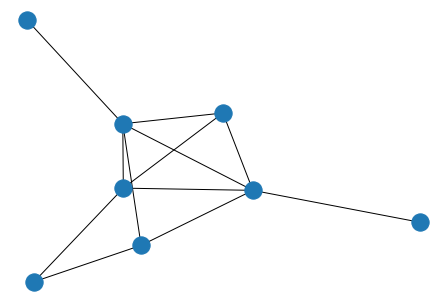

In [12]:
RG=doRandomGraph(k=3,n_nodes=8)

deg = 0
for node in RG.nodes:
    deg += RG.degree(node)
print("Average degree:", deg/len(RG.nodes))
nx.draw(RG)

# EXERCISE 2

In [13]:
np.random.seed(300)

k=6
n_nodes=500
H=doRandomGraph(n_nodes=n_nodes,k=k)

deg = 0
for node in H.nodes:
    deg += H.degree(node)
print("Average degree:", deg/len(H.nodes))


Average degree: 6.0


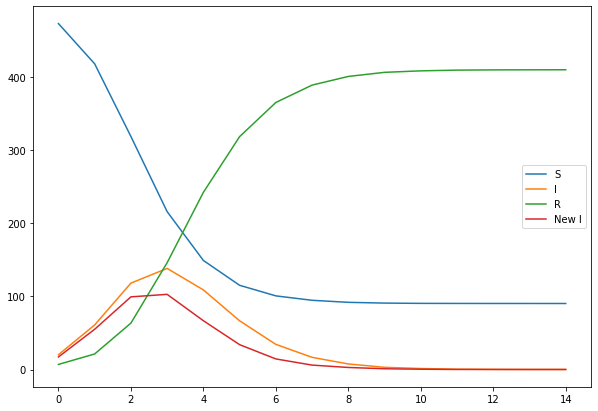

In [14]:
S_nodes_avg,I_nodes_avg,R_nodes_avg,new_I_nodes_avg = model_epidemics(G=H)
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(S_nodes_avg, label='S')
ax.plot(I_nodes_avg, label='I')
ax.plot(R_nodes_avg, label='R')
ax.plot(new_I_nodes_avg, label='New I')
ax.legend(loc='best');

# EXERCISE 3

In [16]:
vacc = np.array([0, 5, 15, 25, 35, 45, 55, 60, 60, 60, 60, 60, 60, 60, 60])
def model_epidemics_vax(G=G,beta=0.3,ro=0.7,infected_start=10,weeks=15,N=100,n_nodes=500,vacc=vacc):
    G=G
    S_nodes=np.empty((N,weeks),dtype=int)
    I_nodes=np.empty((N,weeks),dtype=int)
    R_nodes=np.empty((N,weeks),dtype=int)
    new_I_nodes=np.empty((N,weeks),dtype=int)
    
    I_nodes[:,0] = infected_start 
    new_I_nodes[:,0] = infected_start
    S_nodes[:,0] = n_nodes-infected_start
    R_nodes[:,0] = 0
    
    vac_nodes = (vacc/100 * n_nodes).astype(int)#Take them as a percentage
    new_vac_nodes = np.array(vac_nodes) #Store them inside a numpy array
    new_vac_nodes[1:] = vac_nodes[1:] - vac_nodes[:-1]# persone da vaccinare a settimana t 
    #- persone vaccinate a settimana t
    
    
    
    for n in range(N):
    
        nodes_change = np.zeros((n_nodes, 2), dtype=int)
        for i, node in enumerate(np.random.choice( G.nodes, replace=False,size=(infected_start + vac_nodes[0],))): #devo aggiungere il numero di
            #vaccinati ad ogni iterazione
            
            if i<infected_start:
                nodes_change[node, 0] = 1
            else:
                nodes_change[node, 0] = 3
                
        for w in range(0,weeks):

            s_week=0
            i_week=0
            r_week=0
            new_i_week=0
            v_week=0
            new_v_week=0
            
            if new_vac_nodes[w]!=0:
                nodes_not_vax= np.arange(n_nodes)[nodes_change[:,0]!=3] #Salvo le persone da vaccinare
                #potenzialmente possono essere da vaccinare tutte quelle suscettibili, infettibili e 
                #recoveribili
                nodes_to_vax = np.random.choice(nodes_not_vax,replace=False, size=new_vac_nodes[w])
                #Scelgo, randomicamente, quali persone vaccinare, in accordo alle dosi disponibili per settimana
                for node in nodes_to_vax:
                    nodes_change[node, 0] = 3 #tutte le persone diventano vaccinate

            for node in G.nodes:
                if(nodes_change[node,0]==0):
                    m=0

                    for j in G.neighbors(node):
                        if nodes_change[j,0] == 1:
                            m+=1
                    if np.random.random(1)[0] < (1-beta)**m:
                        nodes_change[node,1]=0
                        s_week = s_week + 1
                    else:
                        nodes_change[node,1]=1
                        new_i_week = new_i_week +1
                        i_week = i_week +1

                elif(nodes_change[node,0]==1):

                    if np.random.random(1)[0]< ro:
                        nodes_change[node,1]= 2
                        r_week= r_week + 1
                    else:
                        nodes_change[node,1] = 1
                        i_week = i_week + 1
                elif(nodes_change[node,0] == 3):
                    nodes_change[node,1] = 3
                    
                else:
                    nodes_change[node,1] = 2
                    r_week = r_week + 1
                
            S_nodes[n,w] = s_week
            I_nodes[n,w] = i_week
            R_nodes[n,w] = r_week
            new_I_nodes[n,w] = new_i_week
            nodes_change[:, 0] = nodes_change[:, 1]

    S_nodes_avg = np.mean(S_nodes, axis=0)
    I_nodes_avg = np.mean(I_nodes, axis=0)
    R_nodes_avg = np.mean(R_nodes, axis=0)
    new_I_nodes_avg = np.mean(new_I_nodes, axis=0)

    
    
    return S_nodes_avg, I_nodes_avg, R_nodes_avg, new_I_nodes_avg, vac_nodes, new_vac_nodes

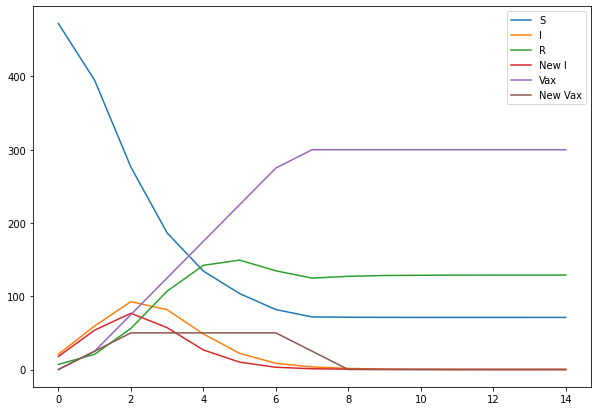

In [17]:
np.random.seed(42)
RG=doRandomGraph(k=6,n_nodes=500)

S_nodes_avg,I_nodes_avg,R_nodes_avg,new_I_nodes_avg,vac_nodes, new_vac_nodes = model_epidemics_vax(G=RG,beta=0.3,ro=0.7,infected_start=10,weeks=15,N=100,n_nodes=500,vacc=vacc)
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(S_nodes_avg, label='S')
ax.plot(I_nodes_avg, label='I')
ax.plot(R_nodes_avg, label='R')
ax.plot(new_I_nodes_avg, label='New I')
ax.plot(vac_nodes, label='Vax')
ax.plot(new_vac_nodes,label='New Vax')
ax.legend(loc='best');

# EXERCISE 4

In [46]:
np.random.seed(42)

I_0 = np.array([1, 1, 3, 5, 9, 17, 32, 32, 17, 5, 2, 1, 0, 0, 0, 0])
weeks = 16

vacc = np.array([5, 9, 16, 24, 32, 40, 47, 54, 59, 60, 60, 60, 60, 60, 60, 60])
n_nodes = 934
N = 10

In [50]:
def searchTop(N,n_nodes,vacc,weeks,I_0,k_start,delta_k,beta_start,delta_beta,ro_start,delta_ro):
    ks = np.array([k_start-delta_k,k_start,k_start+delta_k])
    betas = np.array([beta_start-delta_beta,beta_start,beta_start+delta_beta])
    ros = np.array([ro_start-delta_ro,ro_start,ro_start+delta_ro])
    
    for i in range(3):
        if betas[i] < 0.0:
            betas[i] = 0.0 #Questo parametro deve essere compreso sempre tra 0 e 1,
            #perciò devo controllare gli estremi
        elif betas[i] > 1.0:
            betas[i] = 1.0
        
        if ros[i] < 0.0 : #Anche questo parametro deve essere compreso sempre tra 0 e 1
            ros[i] = 0.0
        elif ros[i] > 1.0 :
            ros[i] = 1
        
        if ks[i] < 2:
            ks[i] = 2 # Il grafo randomico deve avere almeno un k >= 2
    
    S_nodes=np.zeros((3,3,3,weeks),dtype=int)
    I_nodes=np.zeros((3,3,3,weeks),dtype=int)
    R_nodes=np.zeros((3,3,3,weeks),dtype=int)
    new_I_nodes=np.zeros((3,3,3,weeks),dtype=int)
    
    infected_start = I_0[0] #Gli infetti iniziali sono dati da questo numero (lo dice il testo)
    
    rmse = np.zeros((3,3,3)) #Inizializzo la misura tra valore vero e predetto data dal testo
    
    for i,k in enumerate(ks):#Per ogni set di iperparametri...
        for c,b in enumerate(betas):
            for ct,r in enumerate(ros):#...a)Genero un random graph...
                RG = doRandomGraph(n_nodes,k)#... avente un determinato numero di nodi e grado medio dato da k
                #b) Simulazione dell'epidemia con i vaccini, partendo dalla settimana 42
                S_nodes_avg,I_nodes_avg,R_nodes_avg,new_I_nodes_avg,vac_nodes, new_vac_nodes = model_epidemics_vax(G=RG,beta=b,ro=r,infected_start=infected_start,weeks=weeks,N=N,n_nodes=n_nodes,vacc=vacc)
                
                #Devo salvare la media di questi valori in un array che mi tiene conto dei tre iperparametri
                
                S_nodes[i,c,ct] = S_nodes_avg
                I_nodes[i,c,ct] = I_nodes_avg
                R_nodes[i,c,ct] = R_nodes_avg
                new_I_nodes[i,c,ct] = new_I_nodes_avg
                
                #c) calcolare la radice dell'errore medio tra valore predetto e vero pandemico,
                #considerando la differenza tra i nuovi contagi
                
                rmse[i,c,ct] = np.sqrt((1 / (weeks)) * np.sum((new_I_nodes_avg - I_0)**2)
)
                
                #d) Ora si deve ricavare quali siano i parametri migliori, ovvero quelli in cui si 
                #minimizza il rmse
    #print(rmse)
    top = np.unravel_index(np.argmin(rmse),shape=(3,3,3)) 
    #print(top)
    top_k=ks[top[0]]
    top_beta=betas[top[1]]
    top_ro=ros[top[2]]
    #print(top_k)
    #e) Salvo anche la configurazione dei nodi, in presenza di questi migliori iperparametri
    
    top_S_nodes = np.array(S_nodes[top])
    top_I_nodes = np.array(I_nodes[top])
    top_R_nodes = np.array(R_nodes[top])
    top_new_I_nodes = np.array(new_I_nodes[top])
    
    #print(top_S_nodes)
    
    
    return rmse[top], top, top_k, top_beta, top_ro, top_S_nodes, top_I_nodes, top_R_nodes, top_new_I_nodes
    
    

In [51]:
def catchParams(N,n_nodes,vacc,weeks,I_0,k_start,delta_k,beta_start,delta_beta,ro_start,delta_ro):
    
    top_continue = True #Se non c'è miglioramento devo stoppare, questo flag mi controlla il tutto
    top_res = None #Con questo scrivo i parametri corrispondenti al miglioramento
    
    while top_continue:
        
        params = searchTop (N,n_nodes,vacc,weeks,I_0,k_start,delta_k,beta_start,delta_beta,ro_start,delta_ro)
        
        rmse = params[0]
        top_combination = params[1]
        top_k = params[2]
        top_beta = params[3]
        top_ro = params[4]
        
        
        
        print(f"RMSE_error : {rmse}")
        print(f"Index top combination : {top_combination}")
        print(f"K : {top_k}")
        print(f"beta : {top_beta}")
        print(f"ro : {top_ro}")
        
        if top_res == None: #Nel caso non ci fosse miglioramento, tengo i primi parametri (che saranno ovviamente i top)
            top_res = params
        #Controllare se c'è un miglioramento
        
        if (k_start,beta_start,ro_start) == (top_k,top_beta,top_ro):
            top_continue = False
            
            if(params[0] < top_res[0]): #C'è miglioramento
                top_res = params
                
        elif (params[0] > top_res[0]): #Non c'è miglioramento
            top_continue = False
        
        else:
            top_res = params
            k_start,beta_start,ro_start = (top_k,top_beta,top_ro)
    
    return top_res
            

In [52]:
delta_ks = [4,3,2,1]
delta_betas = [0.2,0.1,0.05,0.025]
delta_ros = [0.3,0.2,0.1,0.05]
k_start = 10
beta_start = 0.3
ro_start = 0.7

top_res = None

for i in range (4):
    delta_k = delta_ks[i]
    delta_beta = delta_betas[i]
    delta_ro = delta_ros[i]
    
    params = catchParams(N,n_nodes,vacc,weeks,I_0,k_start,delta_k,beta_start,delta_beta,ro_start,delta_ro)
    
    rmse = params[0]
    top_combination = params[1]
    top_k = params[2]
    top_beta = params[3]
    top_ro = params[4]
    
    if top_res is None or top_res[0] > rmse:
        top_res = params
        
rmse = top_res[0]
top_combination = top_res[1]
top_k = top_res[2]
top_beta = top_res[3]
top_ro = top_res[4]
top_S_nodes=top_res[5]
top_I_nodes=top_res[6]
top_R_nodes=top_res[7]
top_new_I_nodes=top_res[8]    

RMSE_error : 6.422567632964249
Index top combination : (2, 0, 0)
K : 14
beta : 0.09999999999999998
ro : 0.39999999999999997
RMSE_error : 8.787277735453683
Index top combination : (1, 1, 1)
K : 14
beta : 0.09999999999999998
ro : 0.39999999999999997
RMSE_error : 9.4286133657076
Index top combination : (0, 1, 1)
K : 7
beta : 0.3
ro : 0.7
RMSE_error : 8.993365610270718
Index top combination : (1, 1, 1)
K : 7
beta : 0.3
ro : 0.7
RMSE_error : 9.138825143310273
Index top combination : (0, 0, 1)
K : 8
beta : 0.25
ro : 0.7
RMSE_error : 8.035429360028001
Index top combination : (1, 1, 1)
K : 8
beta : 0.25
ro : 0.7
RMSE_error : 16.504090402079118
Index top combination : (0, 0, 2)
K : 9
beta : 0.27499999999999997
ro : 0.75
RMSE_error : 9.103467745864759
Index top combination : (0, 1, 2)
K : 8
beta : 0.27499999999999997
ro : 0.8
RMSE_error : 9.877752780870757
Index top combination : (0, 1, 0)
K : 7
beta : 0.27499999999999997
ro : 0.75


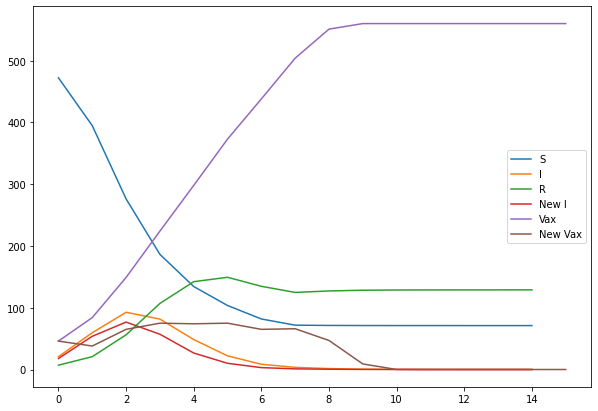

In [53]:
vac_nodes = (vacc/100 * n_nodes).astype(int)#Take them as a percentage
new_vac_nodes = np.array(vac_nodes) #Store them inside a numpy array
new_vac_nodes[1:] = vac_nodes[1:] - vac_nodes[:-1]# persone da vaccinare a settimana t 
    #- persone vaccinate a settimana t

fig, ax = plt.subplots(figsize=(10,7))
ax.plot(S_nodes_avg, label='S')
ax.plot(I_nodes_avg, label='I')
ax.plot(R_nodes_avg, label='R')
ax.plot(new_I_nodes_avg, label='New I')
ax.plot(vac_nodes, label='Vax')
ax.plot(new_vac_nodes,label='New Vax')
ax.legend(loc='best');

RMSE_error : 6.422567632964249
K : 14
beta : 0.09999999999999998
ro : 0.39999999999999997


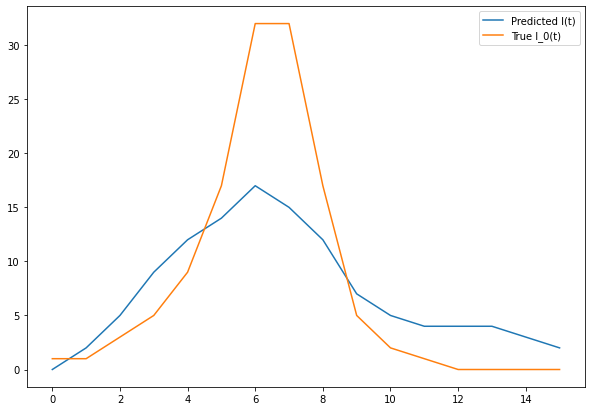

In [54]:
print(f"RMSE_error : {rmse}")
print(f"K : {top_k}")
print(f"beta : {top_beta}")
print(f"ro : {top_ro}")
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(top_new_I_nodes, label='Predicted I(t)')
ax.plot(I_0, label='True I_0(t)')
ax.legend(loc='best');

# EXERCISE 5

In [28]:
import networkx as nx
import numpy as np
from numpy.random import choice, rand 
import numpy as np
import matplotlib.pyplot as plt

#from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from scipy.sparse import lil_matrix, csr_matrix, find
np.random.seed(42)

In [29]:
def infection(m,beta):
    infection_probability = 1 - (1-beta)**m
    return 1 if np.random.rand(1)[0] <= infection_probability else 0

def recovery(p):
    return 1 if np.random.rand(1)[0] >= p else 0

def init_stats(duration,state):
    st = np.zeros([duration,state.shape[0]])
    stats = lil_matrix(st,shape=(duration,state.shape[0]),dtype=int) #faster sparse matrix creation/population
    stats[0,:] = state
    return stats

def group_sum(stats,row):
    previous_state = np.array(find(stats.getrow(row)))[1:]
    zeros = stats.shape[1]-previous_state.shape[1]
    count = {0:zeros}
    for idx in range(previous_state.shape[1]):
        node = previous_state[0,idx]
        value = previous_state[1,idx]
        count[value] = count.get(value,0) + 1
    return count
    
    
def count_new_state_increment(stats,moment, key=1):
    split = stats[moment-1:moment+1,:]
    cii = 0
    for n in range(split.shape[1]):
        if split[1,n] == key and split[0,n] != key:
            cii += 1
    return cii
            


def epidemic_simulation(G,model,state,duration,beta,p,vaccination=None):
    stats = init_stats(duration,state)
    if vaccination:
        vaccinated = np.array([])
    for moment in range(1,duration):
        if vaccination:
            vaccines = int((vaccination[moment]-vaccination[moment-1])/100 *state.shape[0])
            to_be_vaccinated = choice([x for x in range(state.shape[0]) if x not in vaccinated], vaccines, replace=False)
            for vac in to_be_vaccinated:
                stats[moment:,vac] = 3
            vaccinated = np.concatenate([vaccinated,to_be_vaccinated])
        for node in G.nodes:
            if stats[moment,node] == 3:
                continue
            node_state = stats[moment-1,node]
            if node_state == 0: #susceptible
                neighbors = [n for n in G.neighbors(node)]
                infected_neighbors = [stats[moment-1,x] for x in neighbors].count(1)#group_sum(stats,moment,1,neighbors)
                stats[moment,node] = infection(infected_neighbors,beta)
            elif node_state == 1: #infected
                recovered = recovery(p)
                stats[moment,node] = node_state + recovery(p)
                if recovered > 0: #recovered
                    stats[moment:,node] = 2
            else:
                continue
                
    stats = csr_matrix(stats) #faster sparse matrix computation
    return stats

def multiple_simulation(G,model,state,duration,beta,p,num,vaccination=None, plot=True):
    stats = epidemic_simulation(G,model,state,duration,beta,p,vaccination)
    for i in range(1,num):
        stats = np.column_stack((stats,epidemic_simulation(G,model,state,duration,beta,p,vaccination)))
    ev_rate = compute_evolution(stats,duration,vaccination)
    if plot:
        duration = range(duration)
        return plot_avg_state(ev_rate,duration,vaccination)
    else: 
        return ev_rate

def compute_evolution(stats,duration,vaccination=None):
    initial_step = group_sum(stats[0,0],0)
    initial_state = np.zeros(4 + (2 if vaccination else 0))
    for k,v in initial_step.items():
        initial_state[k] = v
    initial_state[-1] = initial_step[1]
    evolution_rate = initial_state
    for moment in range(1,duration):
        if vaccination:
            avg_state = np.zeros(6)
        else:
            avg_state = np.zeros(4)
        for simulation in range(0,stats.shape[1]):
            count = group_sum(stats[0,simulation],moment)
            for k,v in count.items():
                avg_state[k] += v
            avg_state[-1] += count_new_state_increment(stats[0,simulation],moment)
            if vaccination:
                avg_state[-2] += count_new_state_increment(stats[0,simulation],moment,key=3)
        avg_state = avg_state / stats.shape[1]
        evolution_rate = np.column_stack((evolution_rate, avg_state))
    return evolution_rate
        
        
def plot_avg_state(evolution_rate,duration,vaccination=None):
    #evolution_rate = compute_evolution(stats,duration,vaccination)
    ig, ax= plt.subplots(figsize=(10,7))
    ax.plot(duration, evolution_rate[0,:], label='S')
    ax.plot(duration, evolution_rate[1,:], label='I')
    ax.plot(duration, evolution_rate[2,:], label='R')
    if vaccination:
        ax.plot(duration, evolution_rate[3,:], label='Vaccinated')
        ax.plot(duration, evolution_rate[-2,:], label='New Vaccines')
    ax.plot(duration, evolution_rate[-1,:], label='New Infections')
    ax.set(xlabel='time (weeks)',ylabel='folks', title='Epidemic simulation')
    ax.legend(loc='best');
    return evolution_rate
    #print(evolution_rate)

def RMSE(i,i_true):
    return np.sqrt(1/i.shape[0]*sum((i-i_true)**2))

def search_pandemic(tested_hp,N,model,params,i_true,state,duration,num,vaccination=None,best_res=None):
    grid = ParameterGrid(params)
    best_res = None
    for params in grid:
        if(params in tested_hp):
            continue
        else:
            tested_hp.append(params)
        rg = RandomGraphGenerator(N,params['k'])
        ev_rate = multiple_simulation(rg.G,model,state,simulation_time,params['b'],params['p'],attempts,vacc,plot=False)
        newly_inf = ev_rate[-1,:]
        result = RMSE(newly_inf,i_true)
        if not best_res or result < best_res[0]:
            best_res = [result,ev_rate,params]
    return best_res, tested_hp

def plot_newly_infected(duration,i,i_true):
    ig, ax= plt.subplots(figsize=(10,7))
    ax.plot(duration, i, label='New Infected (Simulation)')
    ax.plot(duration, i_true, label='New Infected (GT)')
    ax.set(xlabel='time (weeks)',ylabel='folks', title='hp comparison (k,p,b)')
    ax.legend(loc='best');
    
        
def parameters_search(N,paramatrix,model,params,i_true,state,duration,num,vaccination=None):
    tested_hp = []
    best_res = None
    while True:
        params = validate_params(paramatrix)
        print(params)
        sc_stat_par,tested_hp = search_pandemic(tested_hp,N,SIR,params,NI_true,status,simulation_time,attempts,vacc,best_res)
        if not best_res or sc_stat_par[0] < best_res[0]:
            paramatrix[0,:] = sc_stat_par[2]['k'],sc_stat_par[2]['b'],sc_stat_par[2]['p']
            best_res = sc_stat_par
        elif sc_stat_par[2] == best_res[2] and paramatrix[1,1] >= 0.1:
            paramatrix[1,1:] /= 2
        elif sc_stat_par[0] > best_res[0]:
            break
            
    plot_avg_state(best_res[1],range(duration),vaccination)
    plot_newly_infected(range(duration),best_res[1][-1,:],i_true)
    print(best_res[0],best_res[2])
    
def validate_param(vals,lb=0,ub=1,integ=False):
    valval = []
    for v in vals:
        if v < lb:
            v = lb
        elif v > ub:
            v = ub
        if integ:
            v = int(v)
        valval.append(v)
    return valval
    
def validate_params(paramatrix):
    k0, b0, p0 = paramatrix[0,:]
    dk, db, dp = paramatrix[1,:]
    params = {
        'k': validate_param([k0-dk, k0, k0+dk],2,934,True),
        'b': validate_param([b0-db, b0, b0+db]),
        'p': validate_param([p0-dp, p0, p0+dp])
    }
    return params

In [30]:
class RGConfModel():
  def __init__(self,N,mu,sigma=None):
    self.N = N
    self.mu = mu
    self.sigma = sigma if sigma else mu/4
    self.WCM = np.zeros((N,N))
    self.available_targets = np.arange(N)
    self.residual_degrees = None
    self.G = None
    self.init_graph_distribution()
    self.init_graph()
    

  def init_graph(self):
    #self.print(self.residual_degrees)
    for i in range(self.N):
      # a target is available if its residual in degree is positive
      available_targets = np.argwhere(self.residual_degrees > 0).flatten()
      if available_targets.shape[0] == 0:
        break
      # randomly connect the link to the targets
      targets = np.random.choice(available_targets,self.residual_degrees[i], [self.available_targets/np.sum(self.residual_degrees)])
      self.residual_degrees[i] -= targets.shape[0]
      for target in targets:
        if self.residual_degrees[target] < 1:
          available_targets = self.available_targets[np.argwhere(self.residual_degrees > 0)].flatten()
          if available_targets.shape[0] == 0:
            break
          #self.print(available_targets)
          target = np.random.choice(available_targets,1)
        self.WCM[i,target] = 1
        self.WCM[target,i] = 1
        self.residual_degrees[target] -=1
    self.G = nx.from_numpy_array(self.WCM, create_using=nx.Graph)

  def init_graph_distribution(self):
    s = np.random.normal(self.mu, self.sigma, self.N) #Select a number through a normal distribution, given a mean and a standard deviation
    n = s.astype(np.int32) #Cast it to integer
    #self.print(np.sum(s)/s.shape[0],np.std(s, ddof=1),np.sum(n)/n.shape[0],np.std(n, ddof=1))
    n[n<1] = 1 #Check if the number of edges is suitable 
    nodes_to_add_remove = int(sum(s) - sum(n)) #adds randomly some connection in order to minimize the int cast error
    ex = np.random.choice(range(self.N), abs(nodes_to_add_remove)) #Inside all the possible nodes, select a number of nodes to add (for example, in N=100 nodes, take 8 nodes)
    for i in ex: #Iterate over the selected node
      if nodes_to_add_remove > 0:  
        n[i] += 1 
      else:
        if n[i] > 2: 
          n[i] -= 1
        else:
          while True:
            new_index = np.random.randint(N)
            if n[new_index] > 2:
              n[new_index] -= 1
              break
    #self.print(np.sum(n)/n.shape[0],np.std(n, ddof=1))
    self.residual_degrees = np.array(n)

  def print(self,*param):
    print(param)

  def draw(self):
    nx.draw(self.G)

In [27]:
from sklearn.model_selection import ParameterGrid
N = 934
vacc = [5,9,16,24,32,40,47,54,59,60,60,60,60,60,60,60]
status = np.zeros(N,dtype=np.int32)
init_infected = choice(range(status.shape[0]),1)
status[init_infected] = 1
simulation_time = 16
attempts = 10
SIR = {'S':0,'I':1,'R':2, 'V':3}
NI_true = [1,1,3,5,9,17,32,32,17,5,2,1,0,0,0,0]
k0, b0, p0 = 10, 0.3, 0.6
dk, db, dp = 1, 0.1, 0.1
paramatrix = np.array([[k0,b0,p0],[dk,db,dp]])

In [31]:
from sklearn.model_selection import ParameterGrid
from numpy import linspace
N = 934
vacc = [5,9,16,24,32,40,47,54,59,60,60,60,60,60,60,60]
status = np.zeros(N,dtype=np.int32)
init_infected = choice(range(status.shape[0]),1)
status[init_infected] = 1
simulation_time = 16
attempts = 5
SIR = {'S':0,'I':1,'R':2, 'V':3}
NI_true = [1,1,3,5,9,17,32,32,17,5,2,1,0,0,0,0]

def RMSE(i,i_true):
    return np.sqrt(1/i.shape[0]*sum((i-i_true)**2))

def plot3D(results):
  dataset = [x[2] for x in results]
  x = [x['mu'] for x in dataset]
  y = [y['b'] for y in dataset]
  z = [z['p'] for z in dataset]
  size = [30*s['sigma'] for s in dataset]
  color_score = np.log([x[0]+1 for x in results])

  fig,ax = plt.subplots(figsize=(15,10))
  ax = plt.axes(projection = '3d')
  ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.3, 
        alpha = 0.2) 
  my_cmap = plt.get_cmap('viridis')
  sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = color_score, 
                    cmap = my_cmap, 
                    s = size,
                    marker ='o')
 
  plt.title("Parameter Space")
  ax.set_xlabel('Mu', fontweight ='bold') 
  ax.set_ylabel('Beta', fontweight ='bold') 
  ax.set_zlabel('Ro', fontweight ='bold')
  fig.colorbar(sctt, ax = ax, shrink = 0.3, aspect = 5)
  
  # show plot
  plt.show()






def plot_newly_infected(duration,i,i_true):
    ig, ax= plt.subplots(figsize=(10,7))
    ax.plot(duration, i, label='New Infected (Simulation)')
    ax.plot(duration, i_true, label='New Infected (GT)')
    ax.set(xlabel='time (weeks)',ylabel='folks', title='hp comparison (k,p,b)')
    ax.legend(loc='best');
    
'''
def choose_random_params(params,quantity=1,distribution=None):
  ps = {}
  for k,vs in params.items():
    ps[k] = choice(vs,quantity,distribution)[0]
  return ps
'''

def choose_random_params(params):
  ps = {}
  for k,vs in params.items():
    ps[k] = np.random.uniform(vs[0],vs[1])
  return ps

def iterative_random_search_simulation(k,q,prev_res,attempts,N,model,i_true,state,duration,vaccination=None):
  #prev_res, k best results, q random space points
  
  if prev_res:
    #print([x[2] for x in prev_res])
    results = prev_res[:]
    best_ress = sorted(results, key=lambda x: x[0])[:k]
    par_sp = [x[2] for x in best_ress]
    params_space = {
        'mu': [min(x['mu'] for x in par_sp),max(x['mu'] for x in par_sp)],
        'sigma': [min(x['sigma'] for x in par_sp),max(x['sigma'] for x in par_sp)],
        'p': [min(x['p'] for x in par_sp),max(x['p'] for x in par_sp)],
        'b': [min(x['b'] for x in par_sp),max(x['b'] for x in par_sp)],
    }
  else:
    results = []
    params_space = {
      'mu': [2,20],
      'sigma': [0,15],
      'p': [0,1],
      'b': [0,1],
    }
  print(params_space)
  for point in range(q):
    params = choose_random_params(params_space)
    CMG = RGConfModel(N,params['mu'],params['sigma']).G
    ev_rate = multiple_simulation(CMG,model,state,simulation_time,params['b'],params['p'],attempts,vacc,plot=False)
    newly_inf = ev_rate[-1,:]
    result = RMSE(newly_inf,i_true)
    results.append([result,ev_rate,params])
  
  return results


def research_random(iter,N,k,q,attempts,model,i_true,state,duration,vaccination=None):
  results = None ## define for first iteration
  for i in range(iter):
    results = iterative_random_search_simulation(k,q,results,attempts,N,model,i_true,state,duration,vaccination)

  best_res = sorted(results, key=lambda x: x[0])[0]
  #print(best_res)
  plot_avg_state(best_res[1],duration,vaccination)
  plot_newly_infected(duration,best_res[1][-1,:],i_true)
  print(best_res[0],best_res[2])
  plot3D(results)



{'mu': [2, 20], 'sigma': [0, 15], 'p': [0, 1], 'b': [0, 1]}
{'mu': [5.235725567354626, 18.232950100817412], 'sigma': [2.1592174353974976, 12.962368006512547], 'p': [0.21188015625614098, 0.8138059144416331], 'b': [0.01796690832692671, 0.23363230976353477]}
{'mu': [5.235725567354626, 18.232950100817412], 'sigma': [6.961229418606835, 12.962368006512547], 'p': [0.21188015625614098, 0.6348417147253063], 'b': [0.12163098396604331, 0.23363230976353477]}
{'mu': [5.448654497649084, 18.232950100817412], 'sigma': [6.961229418606835, 12.962368006512547], 'p': [0.24663472378337614, 0.5424656598234484], 'b': [0.15980621399233338, 0.23172861222868918]}
{'mu': [5.448654497649084, 10.65519122266151], 'sigma': [7.321795297954031, 12.277152430909059], 'p': [0.3209441147153178, 0.5170391912741544], 'b': [0.16485455932292703, 0.23172861222868918]}
{'mu': [7.120777255678705, 8.103277883924639], 'sigma': [8.00725603338554, 12.277152430909059], 'p': [0.3209441147153178, 0.48098345162306994], 'b': [0.164984273

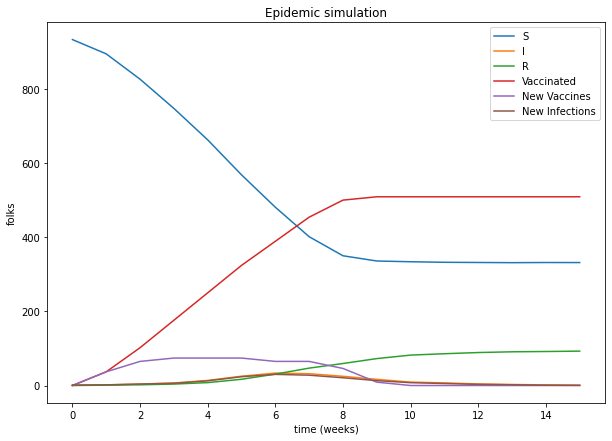

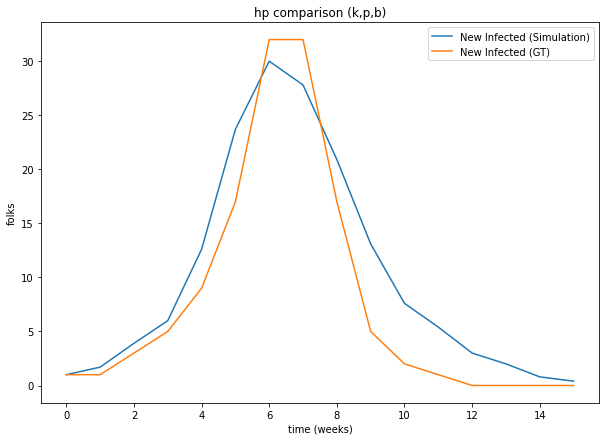

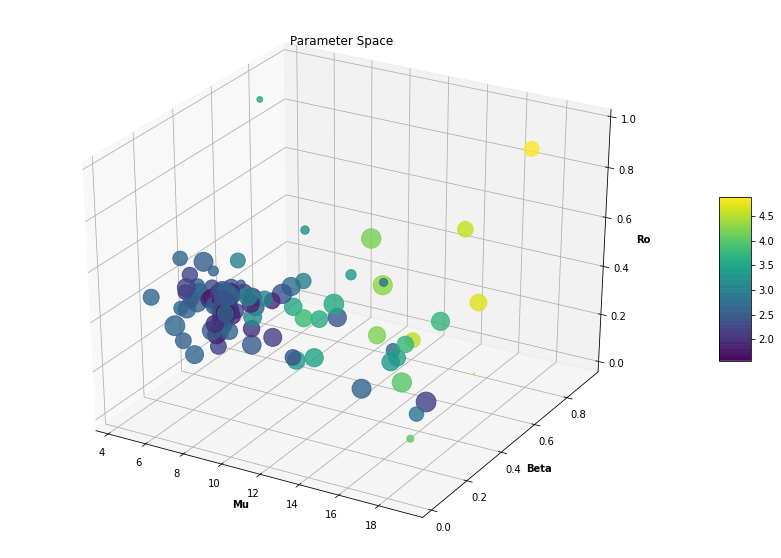

In [32]:
N = 934
vacc = [5,9,16,24,32,40,47,54,59,60,60,60,60,60,60,60]
status = np.zeros(N,dtype=np.int32)
init_infected = choice(range(status.shape[0]),1)
status[init_infected] = 1
simulation_time = 16
attempts = 10
SIR = {'S':0,'I':1,'R':2, 'V':3}
NI_true = [1,1,3,5,9,17,32,32,17,5,2,1,0,0,0,0]
research_random(7,N,5,15,attempts,None,NI_true,status,range(simulation_time),vacc)